# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [253]:
data = pd.read_csv("../data/states_edu.csv")
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [254]:
data["AVG_MATH_8_SCORE"] = data["AVG_MATH_8_SCORE"].dropna()

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_MATH_8_SCORE*

How many years of data are logged in our dataset? 

In [255]:
data["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [256]:
state_avgs = data.groupby("STATE")[["AVG_MATH_8_SCORE"]].mean()
print("Michigan:", state_avgs.loc["MICHIGAN"].values[0])
print("Ohio:", state_avgs.loc["OHIO"].values[0])

Michigan: 276.1666666666667
Ohio: 282.25


Find the average for your outcome score across all states in 2019

In [257]:
data.groupby("YEAR")[["AVG_MATH_8_SCORE"]].mean().loc[2019].values[0]

281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [258]:
data.groupby("STATE")[["AVG_MATH_8_SCORE"]].max()

,AVG_MATH_8_SCORE
STATE,
ALABAMA,269.0
ALASKA,283.0
ARIZONA,283.0
ARKANSAS,279.0
CALIFORNIA,277.0
COLORADO,292.0
CONNECTICUT,289.0
DELAWARE,284.0
DISTRICT_OF_COLUMBIA,269.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [259]:
data["FUNDING_EXPENDITURE_RATIO"] = (data["TOTAL_REVENUE"]) / data["TOTAL_EXPENDITURE"]
state_year_per_rev = data.dropna(subset=['STATE', 'YEAR', 'TOTAL_REVENUE'])

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

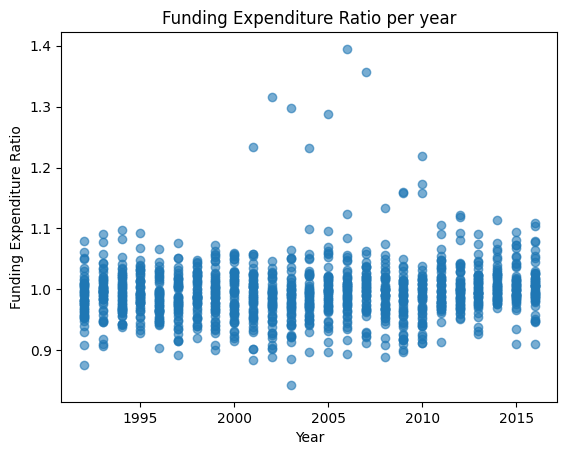

In [260]:
import matplotlib.pyplot as plt

plt.scatter(data["YEAR"], data["FUNDING_EXPENDITURE_RATIO"], alpha=0.6)
plt.title("Funding Expenditure Ratio per year")
plt.xlabel("Year")
plt.ylabel("Funding Expenditure Ratio")
plt.show()

Funding expenditure Ratio Per Year. Seems to gravitate towards 1 with some exceptions. No correlation seen

**Visualization 2**

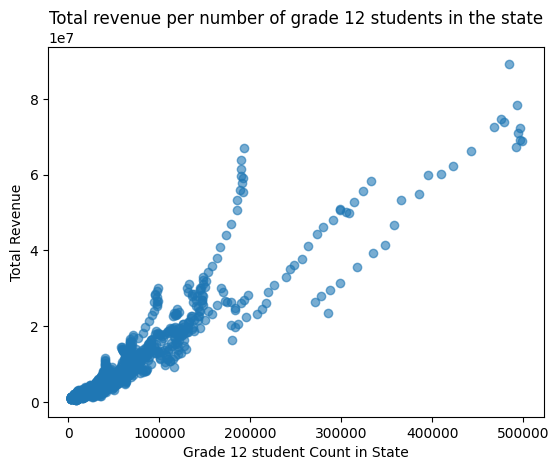

In [261]:
plt.scatter(data["GRADES_12_G"], data["TOTAL_REVENUE"], alpha=0.6)
plt.title("Total revenue per number of grade 12 students in the state")
plt.xlabel("Grade 12 student Count in State")
plt.ylabel("Total Revenue")
plt.show()


Revenue per number of grade 12 students in state. Correlation seen

**Visualization 2.5**

Showing variations between different states

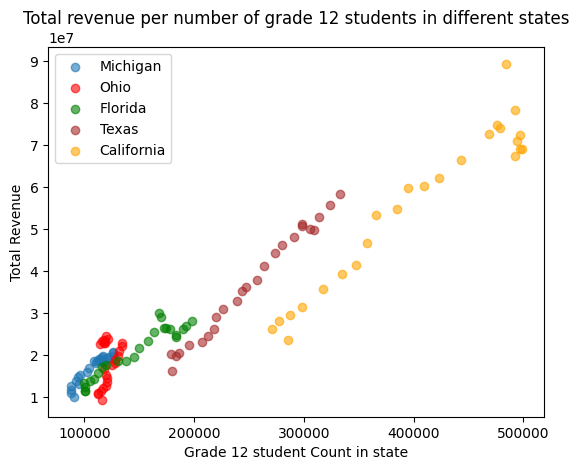

In [262]:
michigan_data = data[data["STATE"] == "MICHIGAN"]
ohio_data = data[data["STATE"] == "OHIO"]
florida_data = data[data["STATE"] == "FLORIDA"]
texas_data = data[data["STATE"] == "TEXAS"]
california_data = data[data["STATE"] == "CALIFORNIA"]
plt.scatter(michigan_data["GRADES_12_G"], michigan_data["TOTAL_REVENUE"], alpha=0.6, label='Michigan')
plt.scatter(ohio_data["GRADES_12_G"], ohio_data["TOTAL_REVENUE"], alpha=0.6, label='Ohio', color='red')
plt.scatter(florida_data["GRADES_12_G"], florida_data["TOTAL_REVENUE"], alpha=0.6, label='Florida', color='green')
plt.scatter(texas_data["GRADES_12_G"], texas_data["TOTAL_REVENUE"], alpha=0.6, label='Texas', color='brown')
plt.scatter(california_data["GRADES_12_G"], california_data["TOTAL_REVENUE"], alpha=0.6, label='California', color='orange')
plt.title("Total revenue per number of grade 12 students in different states")
plt.xlabel("Grade 12 student Count in state")
plt.ylabel("Total Revenue")
plt.legend()
plt.show()


<h2> Data Creation </h2>

_Use this space to create train/test data_

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [264]:
# One-hot encoding the 'STATE' column
encoded_data = pd.get_dummies(data, columns=['STATE'])

In [265]:
y = encoded_data["TOTAL_REVENUE"].dropna()
X = encoded_data[["GRADES_12_G"] + [col for col in encoded_data if col.startswith("STATE_")]].loc[y.index]

In [266]:
# Reshape y
y = y.values.reshape(-1, 1)

Normalize Data

In [267]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [268]:
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)


In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [270]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [271]:
# create your model here
model = LinearRegression()

In [272]:
model.fit(X_train, y_train)

LinearRegression()

In [273]:
y_pred = model.predict(X_test)

Visualization

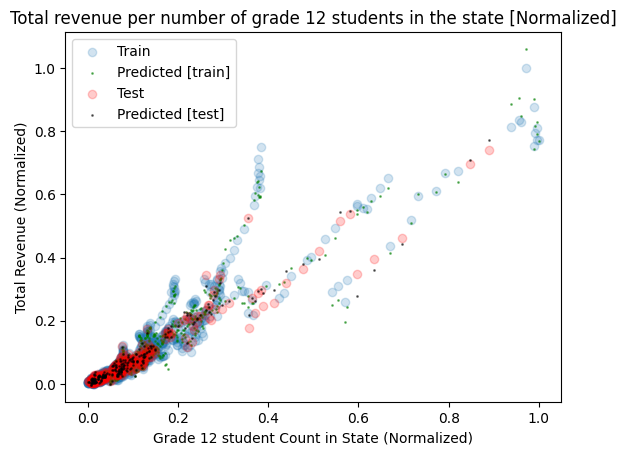

In [274]:
plt.scatter(X_train[:, 0], y_train, alpha=0.2, label='Train') 
plt.scatter(X_train[:, 0], model.predict(X_train), alpha=0.5, label='Predicted [train]', color='green', s=1)
plt.scatter(X_test[:, 0], y_test, alpha=0.2, label='Test', color='red')
plt.scatter(X_test[:, 0], y_pred, alpha=0.5, label='Predicted [test]', color='black', s=1)
plt.title("Total revenue per number of grade 12 students in the state [Normalized]")
plt.xlabel("Grade 12 student Count in State (Normalized)")
plt.ylabel("Total Revenue (Normalized)")
plt.legend()
plt.show()
# I didnt realize the code near the bottom of the file did this for me

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [275]:
print("model score:", model.score(X_test, y_test))
print("mean absolute error:", np.mean(np.abs(model.predict(X_test)-y_test)))
print("root mean squared error:", np.mean((model.predict(X_test)-y_test)**2)**0.5)

model score: 0.9892465464333933
mean absolute error: 0.006926612397457062
root mean squared error: 0.011836837299298315


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

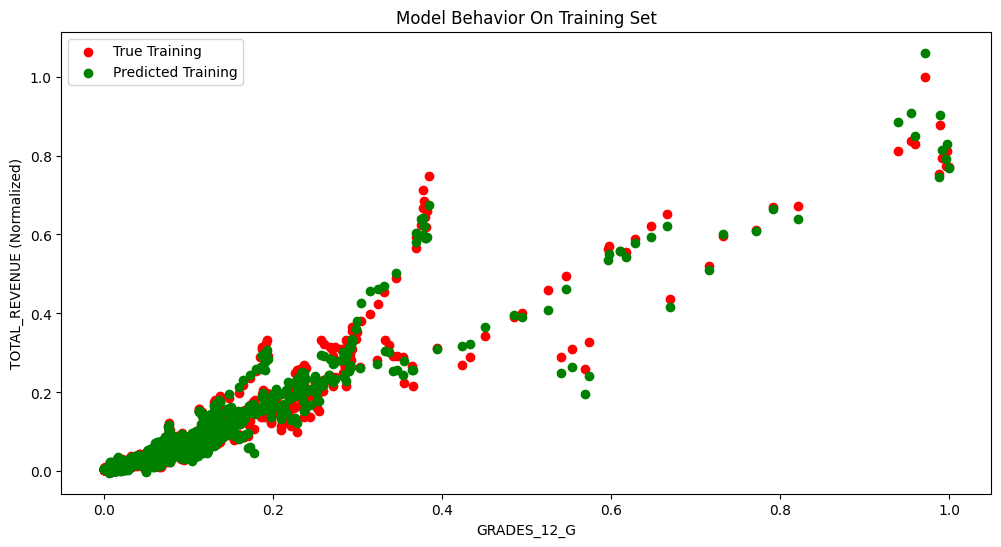

In [276]:
col_name = 'GRADES_12_G'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[:, 0], y_train, color = "red") 
plt.scatter(X_train[:, 0], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('TOTAL_REVENUE (Normalized)')
plt.title("Model Behavior On Training Set")
plt.show()

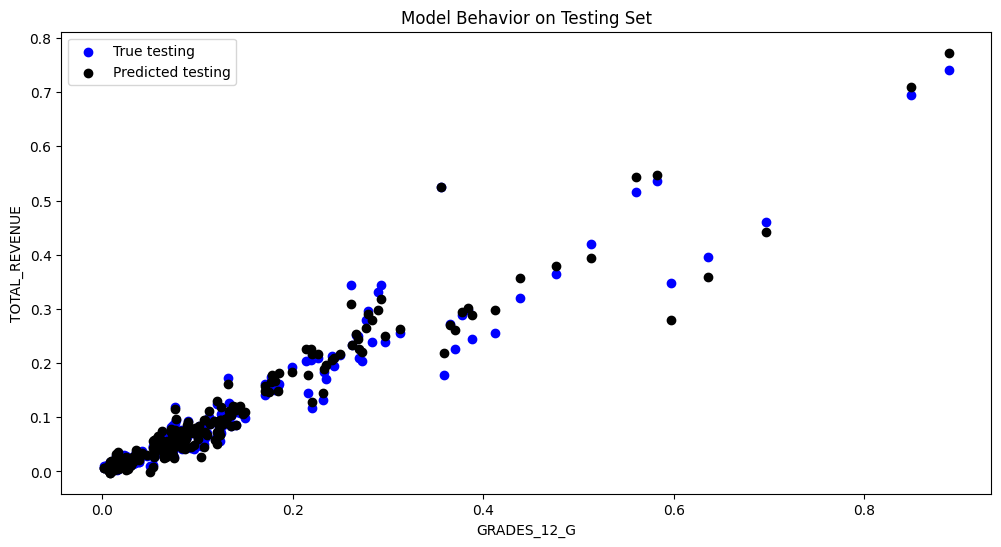

In [277]:
col_name = "GRADES_12_G"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[:, 0], y_test, color = "blue")
plt.scatter(X_test[:, 0], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('TOTAL_REVENUE')
plt.title("Model Behavior on Testing Set")
plt.show()

<h2> Summary </h2>

The model performed very well on both the training data set and test data set. At first I just fed in the grade 12 enrollment without any modifications to test the data set. However, scaling the data and especially one hot encoding the states to be an input as well vastly improved the accuracy (especially with outlier states such as california). Overall, there seems to be a correlation (tho it may have been assumed anyways), but the model seemed to accurately be able to train on this data without overfitting too much.